<a href="https://colab.research.google.com/github/ZYTao12/data-feature/blob/main/Assignment_01_Data_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/projects-in-programming-f24/01_Data_Feature/blob/main/PPDS_Activity_01_Data_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Features: MealMovie Matcher

As soon as Ziyue and I saw the API about the list of meals, we came up with the idea of making a program where it suggests a movie according to what you are having as a meal.

Some people prefer to eat with friends and families, but some feel much comfortable when eating alone. But its boring to be honest. So we came up with the idea where a user can get a random movie to watch that is somewhat related to the meal the user is having - so they won't feel too bored when eating alone.

## Here are the steps:
1. First the user would enter the name of the meal he or she will be having.
2. It will return the information of which that food/dish if originated from.
3. With the country code, we will search from the Movies API, and output a movie from that country.

**With the suggested movie from this program, people would not have to worry about getting bored eating alone.**

# Setting Up the APIs

two APIs used in this project:
1. TheMealDB: used to search dishes by name
2. TVDB: used to fetch movies and match the meal with a movie

The TVDB API is stored in the SECRETS tab.
(TheMealDB uses a public developer API key so it is not saved separately.)

In [ ]:
# Set up the API keys
from google.colab import userdata

# Retrieve the NYTimes API key
TVDB_API_KEY = userdata.get('TVDB_API_KEY')

if TVDB_API_KEY:
    print("TVDB API key retrieved successfully!")
else:
    print("Failed to retrieve TVDB API key. Please check your setup.")

TVDB API key retrieved successfully!


In [ ]:
# TheMealDB API endpoint
MEAL_API_URL = "https://www.themealdb.com/api/json/v1/1/search.php"

# TVDB API endpoint
TVDB_API_URL = "http://api4.thetvdb.com/v4"

In [ ]:
!pip install requests
import requests

def get_tvdb_token():
    login_url = f"{TVDB_API_URL}/login"
    response = requests.post(login_url, json={"apikey": TVDB_API_KEY})
    return response.json()["data"]["token"]

token = get_tvdb_token()
if token:
  print("TVDB token retrieved successfully!")
else:
  print("Failed to retrieve TVDB token. Please check your API key.")

TVDB token retrieved successfully!


# Get meal info and country code
- The get_meal_info() function sends a GET request to TheMealDB API using the meal name provided as a parameter. The API returns meal-related data, such as ingredients, instructions, and region.
- The function retrieves the first meal that matches the search query and returns the data. If no match is found, it returns None.

###Testing TheMealDB API:
- The function is tested by calling get_meal_info("pasta"), which fetches meal data for pasta and prints the result.

###Country Code Conversion:
- The country_converter package (coco) is installed, which helps convert country names or demonyms (like "Italian") to ISO3 country codes (like "ITA").
- A CSV file of demonyms and their corresponding countries is retrieved from GitHub using a URL. The demonyms are used to determine the country a meal is associated with.
- The get_country_code_from_demonym() function takes a demonym, looks it up in the CSV file, finds the associated country, and then converts that country to an ISO3 code using the coco.convert() method.

###Testing Country Code Conversion:
- The function is tested by extracting the strArea (country of origin) of the meal returned from TheMealDB API and converting it to the ISO3 country code.


In [ ]:
import pandas as pd

def get_meal_info(meal_name):
    params = {"s": meal_name}
    response = requests.get(MEAL_API_URL, params=params)
    data = response.json()
    if data["meals"]:
        return data["meals"][0]
    return None

# Test the GET method of TheMealDB API
meal_info = get_meal_info("pasta")
print(meal_info)

{'idMeal': '52777', 'strMeal': 'Mediterranean Pasta Salad', 'strDrinkAlternate': None, 'strCategory': 'Seafood', 'strArea': 'Italian', 'strInstructions': 'Bring a large saucepan of salted water to the boil\r\nAdd the pasta, stir once and cook for about 10 minutes or as directed on the packet.\r\nMeanwhile, wash the tomatoes and cut into quarters. Slice the olives. Wash the basil.\r\nPut the tomatoes into a salad bowl and tear the basil leaves over them. Add a tablespoon of olive oil and mix.\r\nWhen the pasta is ready, drain into a colander and run cold water over it to cool it quickly.\r\nToss the pasta into the salad bowl with the tomatoes and basil.\r\nAdd the sliced olives, drained mozzarella balls, and chunks of tuna. Mix well and let the salad rest for at least half an hour to allow the flavours to mingle.\r\nSprinkle the pasta with a generous grind of black pepper and drizzle with the remaining olive oil just before serving.', 'strMealThumb': 'https://www.themealdb.com/images/me

In [ ]:
!pip install country_converter
import country_converter as coco

# Dictionary of demonyms and their corresponding countries imported from GitHub
demonyms_dict = "https://raw.githubusercontent.com/ZYTao12/data-feature/main/demonyms.csv"

def get_country_code_from_demonym(demonym):
    # Load demonyms CSV file
    df = pd.read_csv(demonyms_dict)
    country = df[df["Demonym"] == demonym]["Country"].values
    country_code = coco.convert(names=country, to='ISO3')
    return country_code if len(country_code) > 0 else demonym

# Test the country code converter helper
print(get_country_code_from_demonym(meal_info['strArea']))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 837.4 kB/s eta 0:00:00
ITA


# Match movie with meal

###Random Movie Selector Function (`get_movies_by_country`):
- The function takes a `country` as input and searches for movies from that country using the TVDB API.
- The `search_url` is created by appending the `/search` endpoint to the base TVDB API URL.
- `params` contains the query for the search, specifically the `country` and type of movies.
- The function sends a GET request to the TVDB API using the `requests.get()` method, passing the necessary headers and search parameters.
- The API response is parsed as JSON, and if there are movies found in the `data` field, a random movie is selected using Python’s `random.choice()` method.
- If no data is returned or the search fails, it returns `None`.

###Testing the Movie Fetching Function:
- The function is tested by passing the ISO3 country code retrieved from the previous part (via the `get_country_code_from_demonym()` function, which extracts the meal's country of origin).
- It prints the result, which is a random movie suggestion from the given country.

This part of the code focuses on querying the TVDB API to retrieve a movie suggestion based on the country associated with the meal, further connecting the meal to a movie for the user.

In [ ]:
import random

def get_movies_by_country(country):
    headers = {"Authorization": f"Bearer {token}"}
    search_url = f"{TVDB_API_URL}/search"
    params = {
        "query": country,
        "type": "movie",
        "country": country
    }
    response = requests.get(search_url, headers=headers, params=params)
    data = response.json()

    if "data" in data and data["data"]:
        suggestion = random.choice(data["data"])
        return suggestion
    return None

print(get_movies_by_country(get_country_code_from_demonym(meal_info['strArea'])))

{'objectID': 'movie-40729', 'country': 'ita', 'extended_title': 'Italian Sex (1974)', 'genres': ['Comedy'], 'id': 'movie-40729', 'image_url': 'https://artworks.thetvdb.com/banners/movies/40729/posters/40729.jpg', 'name': 'Italian Sex', 'first_air_time': '1974-06-11', 'primary_language': 'eng', 'primary_type': 'movie', 'status': 'Released', 'type': 'movie', 'tvdb_id': '40729', 'year': '1974', 'slug': 'italian-sex', 'translations': {'eng': 'Italian Sex', 'ita': 'Sesso in testa', 'spa': 'Doctora en sexo'}, 'remote_ids': [{'id': 'tt0072140', 'type': 2, 'sourceName': 'IMDB'}, {'id': '74647', 'type': 10, 'sourceName': 'TheMovieDB.com'}], 'thumbnail': 'https://artworks.thetvdb.com/banners/movies/40729/posters/40729_t.jpg'}


# Putting It All Together

###main() Function:
- The function starts by prompting the user to input a meal name.
- It calls get_meal_info() to fetch details about the meal based on the user's input.
- If meal information is found, it proceeds to get the meal's country of origin (strArea), converts it to a country code, and then converts that code to a human-readable country name using the coco package.
- It prints a message indicating the country the meal originates from.

###Fetching and Displaying Movie Suggestion:
- The get_movies_by_country() function is called, passing the country code as input.
- If a movie is found, the movie's name, its English translation, and the release year are printed.

###Displaying the Movie Thumbnail:
- If the movie has a thumbnail (poster or cover image), the program fetches the image using requests.get(), processes it using PIL.Image, and then displays it using matplotlib.pyplot.
- The thumbnail is displayed in a 10x10 inch figure with the movie title and release year as the plot's title. If no thumbnail is available, a message is printed indicating that.

###Handling Missing Data:
- If no meal information or movie is found, the program handles the error gracefully by informing the user that no data is available for the meal or movie.

###Program Execution:
- The main() function is called at the end to run the program, prompting user interaction.

This section integrates the functionality by taking user input, fetching the corresponding meal and movie data, and displaying movie information and the thumbnail in a visually engaging way.

In [ ]:
!pip install matplotlib

Enter a meal name: pizza
The meal 'pizza' is from Italy.

Here is a movie suggestion from Italy:
Due piccoli italiani (Due piccoli italiani, 2018)



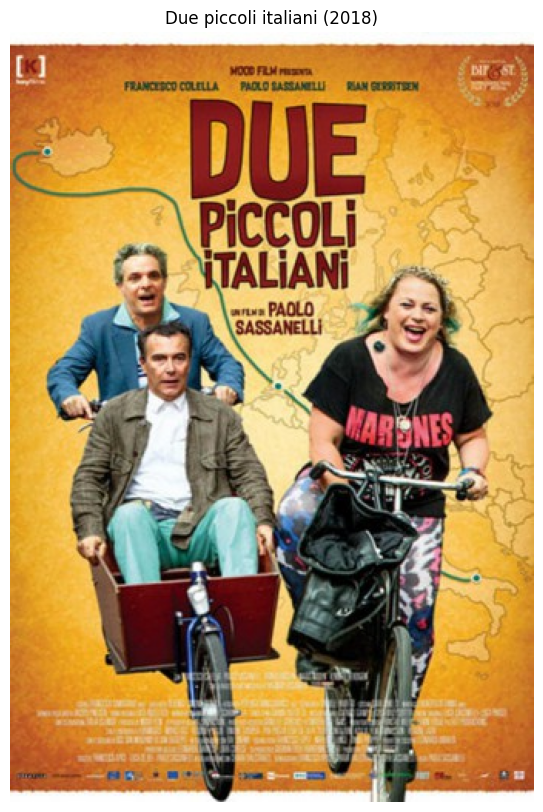

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def main():
    meal_name = input("Enter a meal name: ")
    meal_info = get_meal_info(meal_name)

    if meal_info:
        area = meal_info["strArea"]
        country_code = get_country_code_from_demonym(area)
        country = coco.convert(names=country_code, to='name_short')
        print(f"The meal '{meal_name}' is from {country}.")

        movie = get_movies_by_country(country_code)
        if movie:
            print(f"\nHere is a movie suggestion from {country}:")
            translation = movie['translations'].get('eng', 'No English translation available')
            print(f"{movie['name']} ({translation}, {movie['year']})")
            print()

            # Display the thumbnail image
            if 'thumbnail' in movie:
                response = requests.get(movie['thumbnail'])
                img = Image.open(BytesIO(response.content))
                plt.figure(figsize=(10, 10))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"{movie['name']} ({movie['year']})")
                plt.show()
            else:
                print("No thumbnail available for this movie.")
        else:
            print(f"Sorry, couldn't find any movies from {country}.")
    else:
        print(f"Sorry, couldn't find information for the meal '{meal_name}'.")

if __name__ == "__main__":
    main()